In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_train = pd.read_excel("data_train_full.xlsx").drop(['Unnamed: 0'],axis=1)
data_test = pd.read_excel("data_test_full.xlsx").drop(['Unnamed: 0'],axis=1)

In [4]:
data_test.head()

,Tweet,Following,Followers,Jumlah tweet,K,Tweet_Parsed
0,"Sebuah tanda, umurnya muda badanya renta wkwk...",462,605,36200,Idealist,buah tanda umur muda bada renta wkwk wkwkkw sa...
1,topik kemana emang? topik hidayatkan?wkwk gede...,33,13,62,Idealist,topik topik hidayat wkwk bgtkapan yah bdg sela...
2,Mr. Nadiem is so damn brilliant. https://youtu...,424,1302,25200,Idealist,mr nadiem damn brilliant beli arcanaku ngomong...
3,Itu sepatu apa kucing? Orang lain mungkin pun...,187,293,5127,Guardian,sepatu kucing orang sudut pandang luas lihat k...
4,Bisa di google scholar atau nggak ieeexplore ...,179,14,116,Artisan,google scholar ieeexplore hai angkat tangan wa...


## OOV 

In [5]:
def tokenize(Text):
    tokens = [token for token in Text.str.split(" ") if token !=""]
    ngrams = np.concatenate(tokens)
    return ngrams

In [6]:
tokentrain = tokenize(data_train['Tweet_Parsed']).tolist()
tokentrain = np.unique(tokentrain).tolist()
tokentrain[:10]

['-',
 'aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaa']

In [7]:
tokentest = tokenize(data_test['Tweet_Parsed']).tolist()
tokentest = np.unique(tokentest).tolist()
tokentest[:10]

['-',
 '-lebihin',
 'aaaa',
 'aaaaa',
 'aaaaaaa',
 'aaaaaaaaa',
 'aaaaaahhh',
 'aaaaah',
 'aaahh',
 'aadjik']

In [8]:
OOV = []
for token in tokentest:
    if token not in tokentrain:
        OOV.append(token)
OOV[:10]

['-lebihin',
 'aaaaaaaaa',
 'aaaaaahhh',
 'aaaaah',
 'aadjik',
 'aan',
 'aang',
 'aapolah',
 'aasliiii',
 'abalan']

In [9]:
len(OOV)

2985

## Perbandingan Jumlah Tiap Label (MBTI) 

#### 1. Data Train 

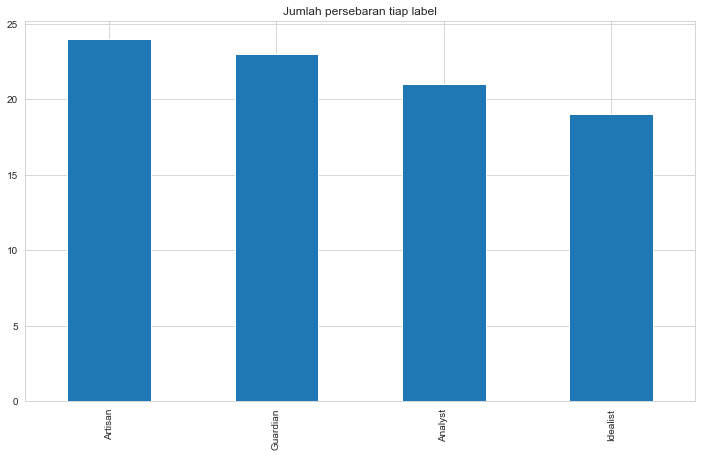

In [10]:
data_train['K'].value_counts().plot(kind='bar',figsize=(12,7),title="Jumlah persebaran tiap label")

#### 2. Data Test 

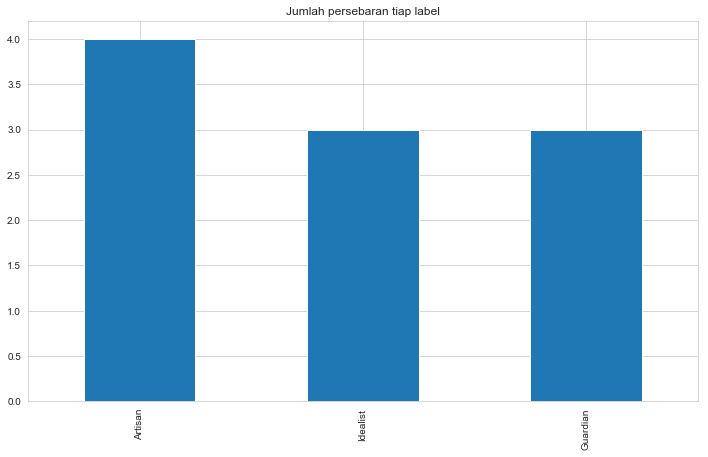

In [11]:
data_test['K'].value_counts().plot(kind='bar',figsize=(12,7),title="Jumlah persebaran tiap label")

## Analisis Fitur 

### Following 

##### Distribusi Jumlah Following 

#### 1. Data Train 

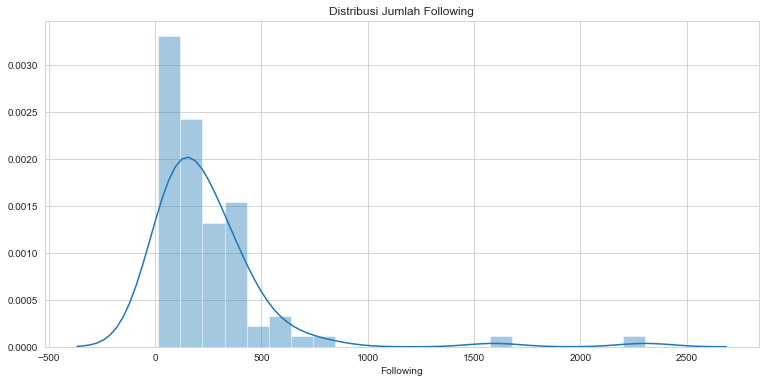

In [12]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_train['Following']).set_title('Distribusi Jumlah Following');

#### 2. Data Test 

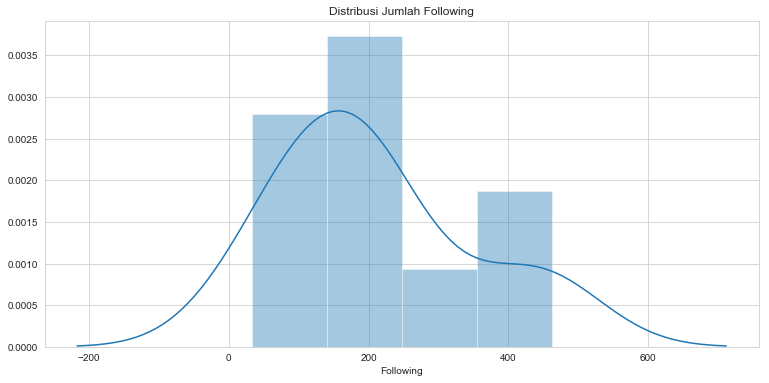

In [13]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_test['Following']).set_title('Distribusi Jumlah Following');

##### Distribusi Jumlah Following per label 

#### 1. Data Train 

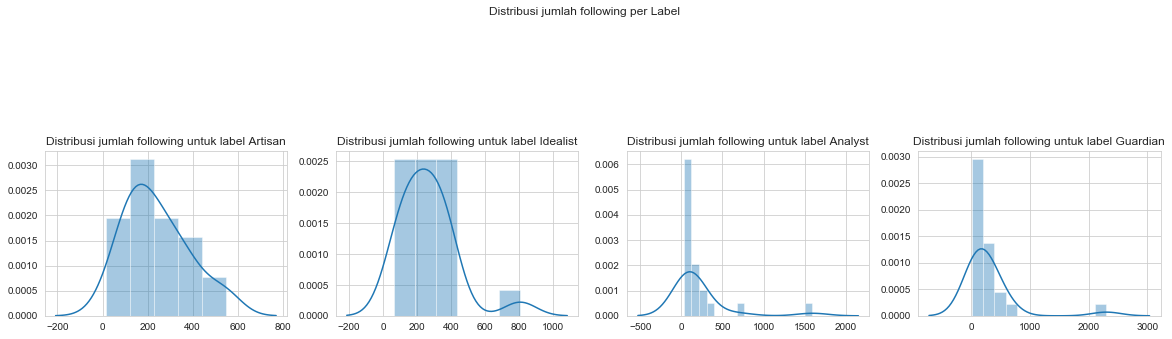

In [14]:
label = data_train["K"].unique()
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah following per Label')
for i in range (len(label)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data_train[data_train['K']==label[i]]['Following'])
    title='Distribusi jumlah following untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### 2. Data Test 

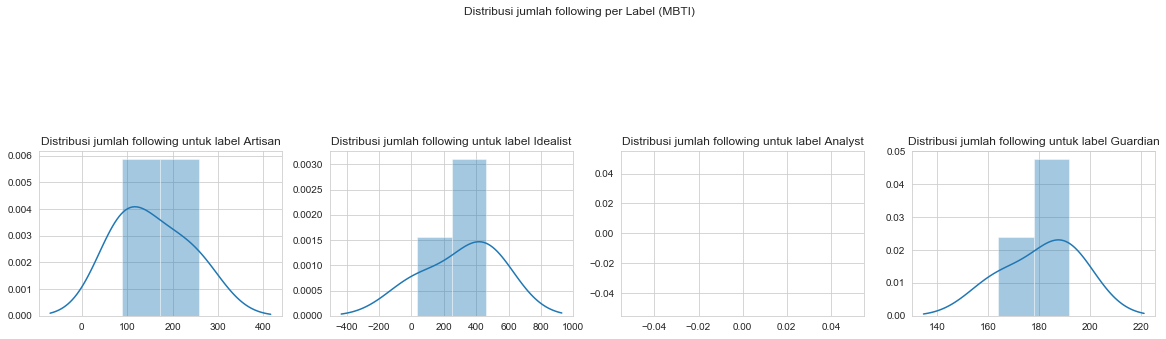

In [15]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah following per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data_test[data_test['K']==label[i]]['Following'])
    title='Distribusi jumlah following untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

## Followers 

##### Distribusi Jumlah Followers 

#### 1. Data Train 

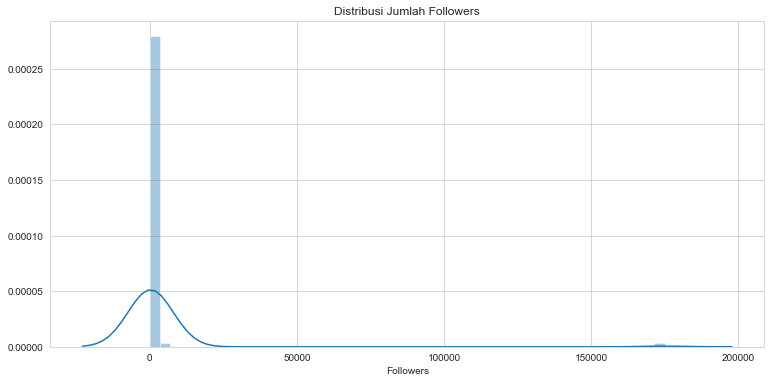

In [16]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_train['Followers']).set_title('Distribusi Jumlah Followers');

#### 2. Data Test 

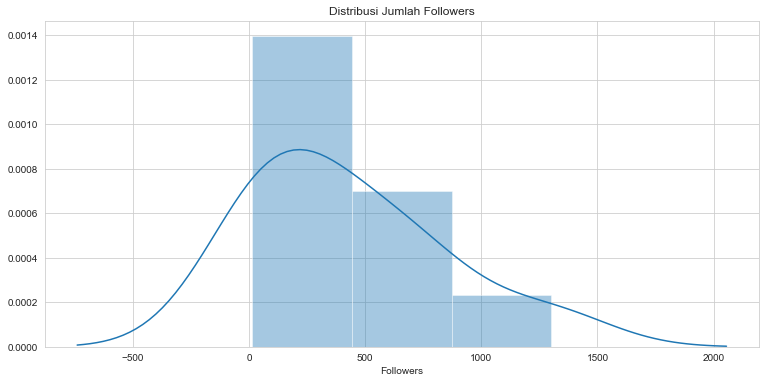

In [17]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_test['Followers']).set_title('Distribusi Jumlah Followers');

##### Distribusi Jumlah Followers per Label 

#### 1. Data Train 

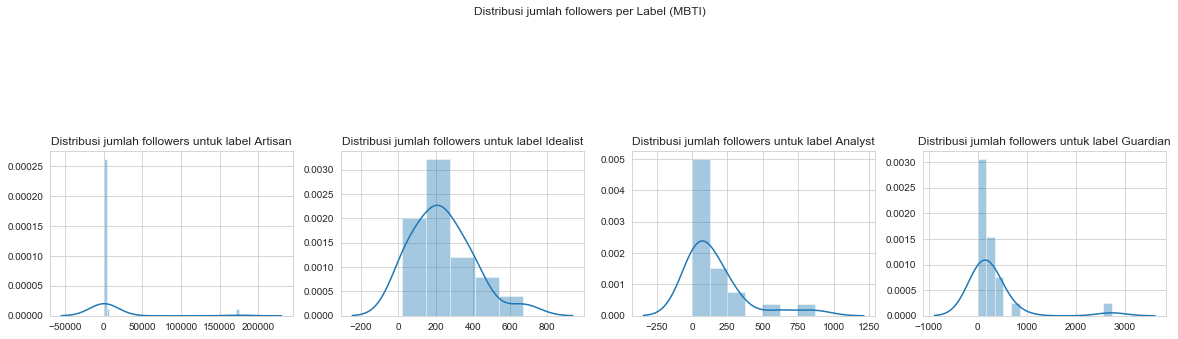

In [18]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah followers per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data_train[data_train['K']==label[i]]['Followers'])
    title='Distribusi jumlah followers untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### 2. Data Test 

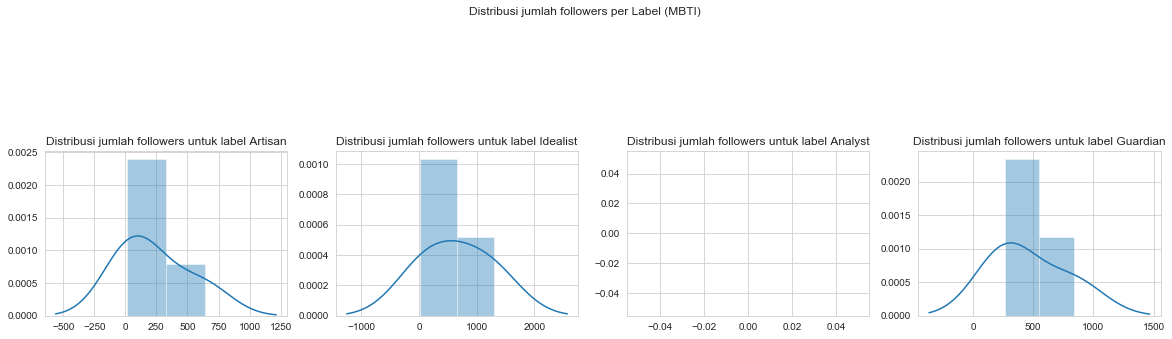

In [19]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah followers per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data_test[data_test['K']==label[i]]['Followers'])
    title='Distribusi jumlah followers untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

## Jumlah Tweet 

##### Distribusi Jumlah Tweet 

#### 1. Data Train 

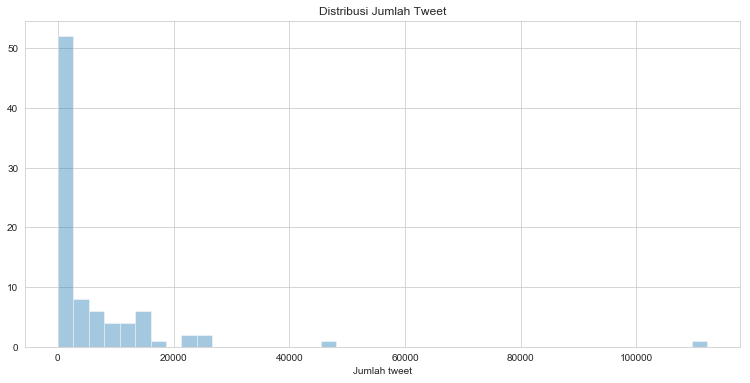

In [20]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_train['Jumlah tweet'],kde=False).set_title('Distribusi Jumlah Tweet');

#### 2. Data Test 

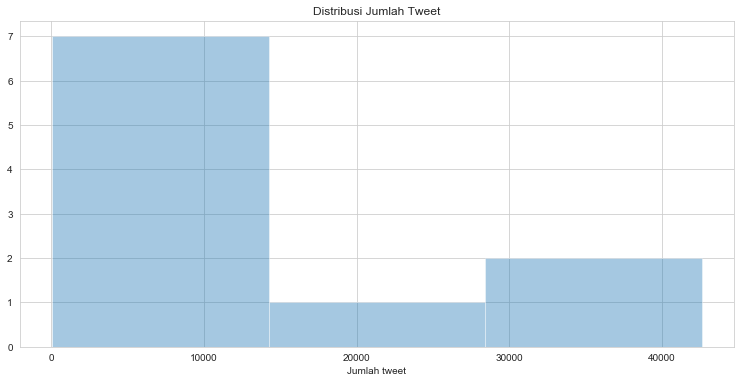

In [21]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_test['Jumlah tweet'],kde=False).set_title('Distribusi Jumlah Tweet');

##### Distribusi Jumlah Tweet per Label 

#### 1. Data Train 

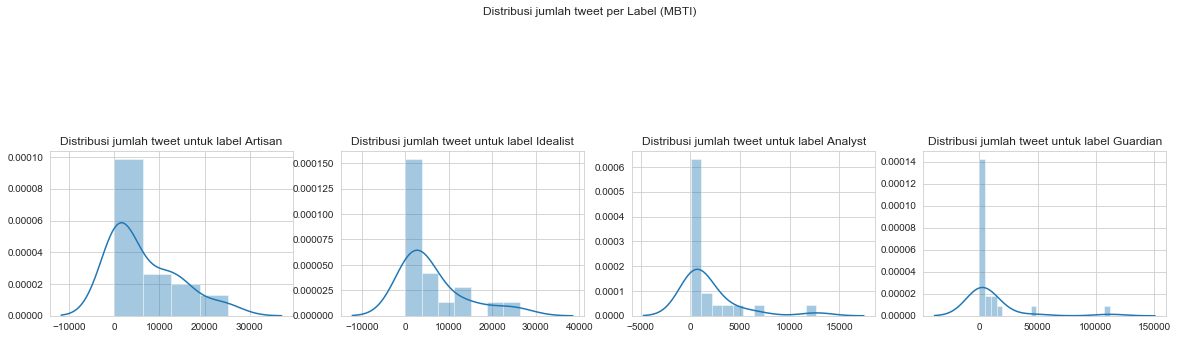

In [22]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah tweet per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data_train[data_train['K']==label[i]]['Jumlah tweet'])
    title='Distribusi jumlah tweet untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### 2. Data Test 

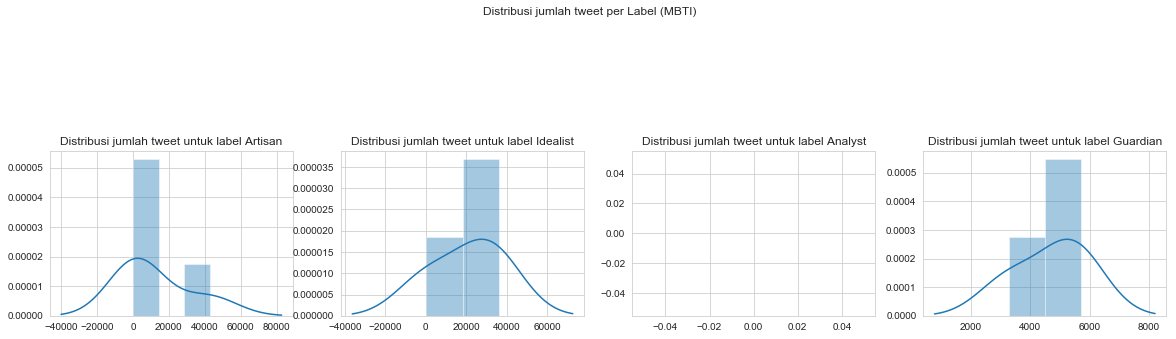

In [23]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah tweet per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(5,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data_test[data_test['K']==label[i]]['Jumlah tweet'])
    title='Distribusi jumlah tweet untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

## Tweet 

##### Persebaran panjang tweet (based on character) 

#### 1. Data Train 

In [24]:
data_anl_ = data_train[["Tweet_Parsed"]].copy()

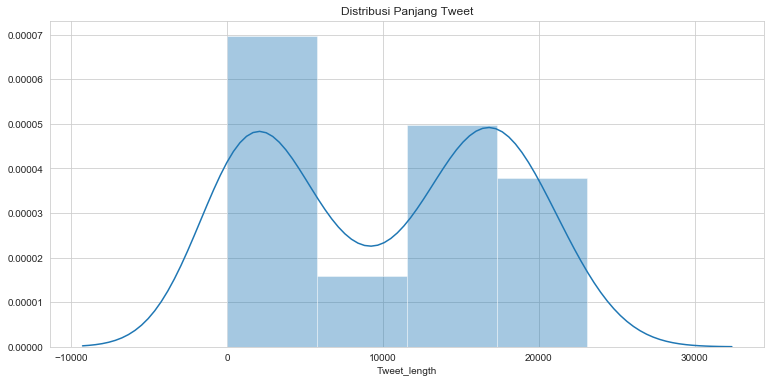

In [25]:
data_anl_['Tweet_length'] = data_anl_['Tweet_Parsed'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['Tweet_length']).set_title('Distribusi Panjang Tweet');

#### 2. Data Test 

In [26]:
data_anl_ = data_test[["Tweet_Parsed"]].copy()

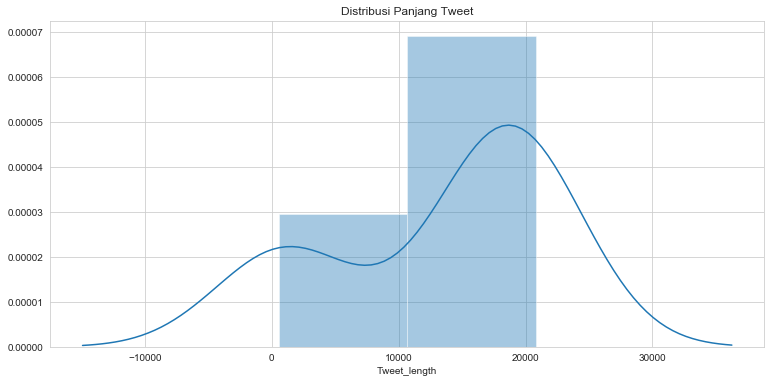

In [27]:
data_anl_['Tweet_length'] = data_anl_['Tweet_Parsed'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['Tweet_length']).set_title('Distribusi Panjang Tweet');

##### Persebaran panjang tweet (based on word) 

#### 1. Data Train 

In [28]:
data_anl_ = data_train[["Tweet_Parsed"]].copy()

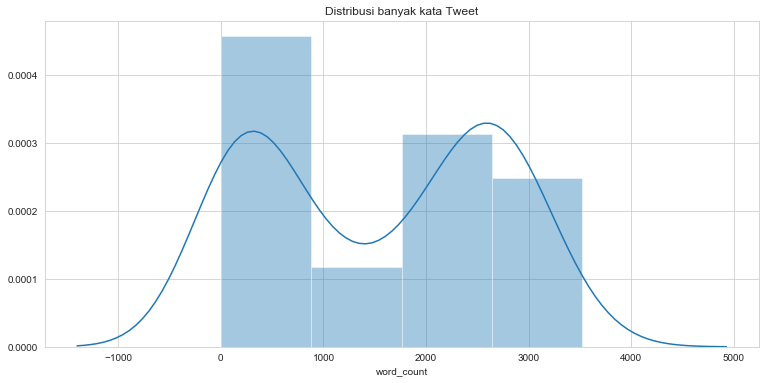

In [29]:
data_anl_['word_count'] = data_anl_['Tweet_Parsed'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['word_count']).set_title('Distribusi banyak kata Tweet');

#### 2. Data Test 

In [30]:
data_anl_ = data_test[["Tweet_Parsed"]].copy()

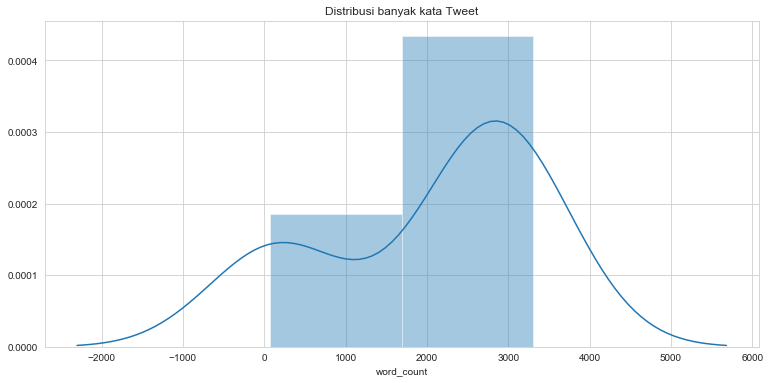

In [31]:
data_anl_['word_count'] = data_anl_['Tweet_Parsed'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['word_count']).set_title('Distribusi banyak kata Tweet');

## Top 20 Words 

In [32]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### 1. Data Train 

In [67]:
dataa = data_train.loc[data_train['K'] == 'Guardian']
data_anl_ = dataa[["Tweet_Parsed"]].copy()

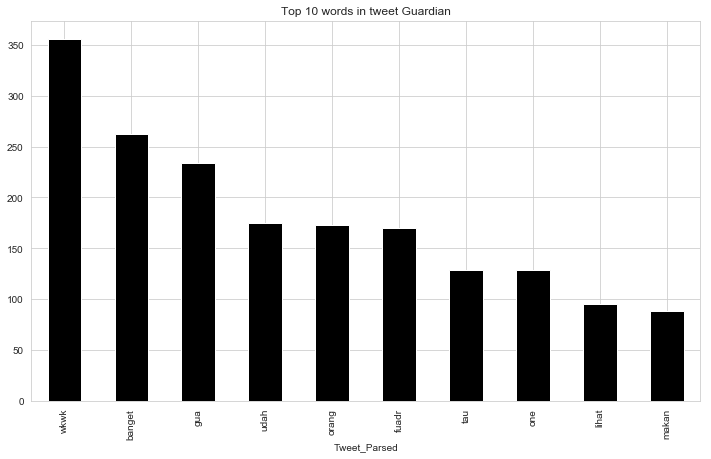

In [85]:
common_words = get_top_n_words(data_anl_['Tweet_Parsed'], 10)
topWord = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topWord.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 10 words in tweet Guardian', figsize=(12,7))

In [86]:
dataa = data_train.loc[data_train['K'] == 'Idealist']
data_anl_ = dataa[["Tweet_Parsed"]].copy()

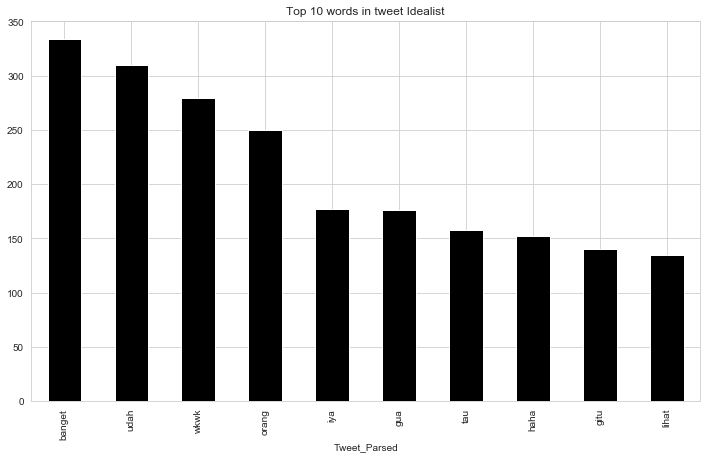

In [87]:
common_words = get_top_n_words(data_anl_['Tweet_Parsed'], 10)
topWord = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topWord.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 10 words in tweet Idealist', figsize=(12,7))

In [99]:
dataa = data_train.loc[data_train['K'] == 'Analyst']
data_anl_ = dataa[["Tweet_Parsed"]].copy()

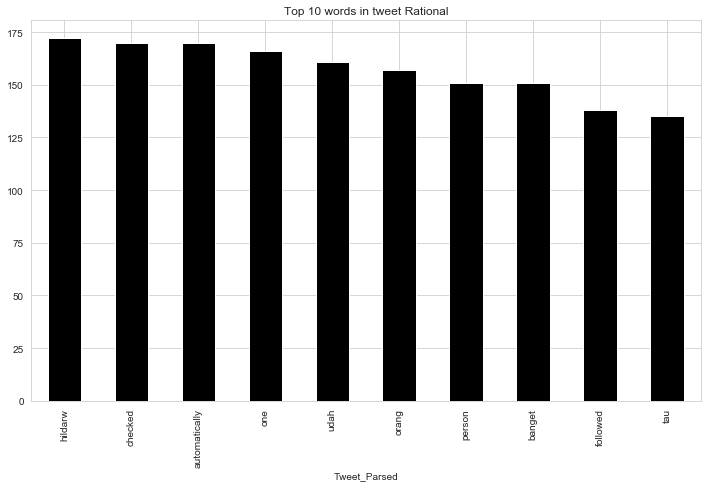

In [100]:
common_words = get_top_n_words(data_anl_['Tweet_Parsed'], 10)
topWord = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topWord.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 10 words in tweet Rational', figsize=(12,7))

In [97]:
dataa = data_train.loc[data_train['K'] == 'Artisan']
data_anl_ = dataa[["Tweet_Parsed"]].copy()

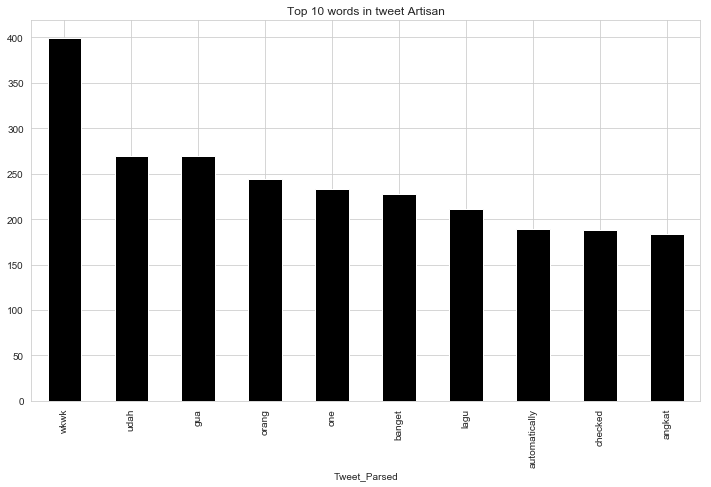

In [98]:
common_words = get_top_n_words(data_anl_['Tweet_Parsed'], 10)
topWord = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topWord.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 10 words in tweet Artisan', figsize=(12,7))

#### 2. Data Test 

In [35]:
data_anl_ = data_test[["Tweet_Parsed"]].copy()

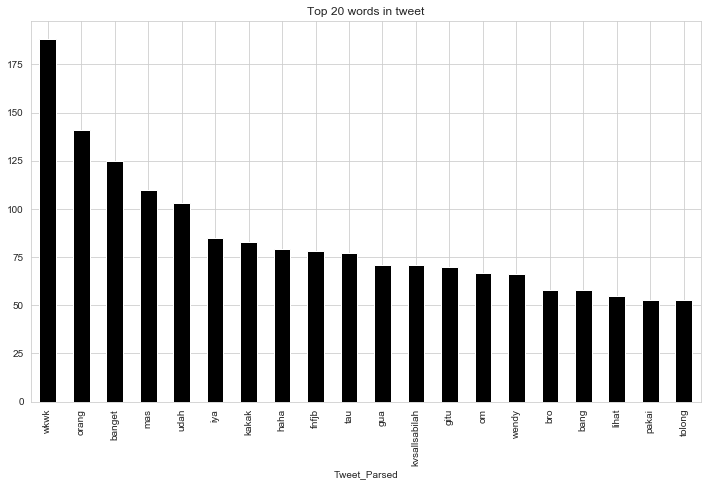

In [36]:
common_words = get_top_n_words(data_anl_['Tweet_Parsed'], 20)
topWord = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topWord.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 words in tweet', figsize=(12,7))

## Top 20 bigrams 

In [77]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### 1. Data Train 

In [78]:
dataa = data_train.loc[data_train['K'] == 'Artisan']
data_anl_ = dataa[["Tweet_Parsed"]].copy()

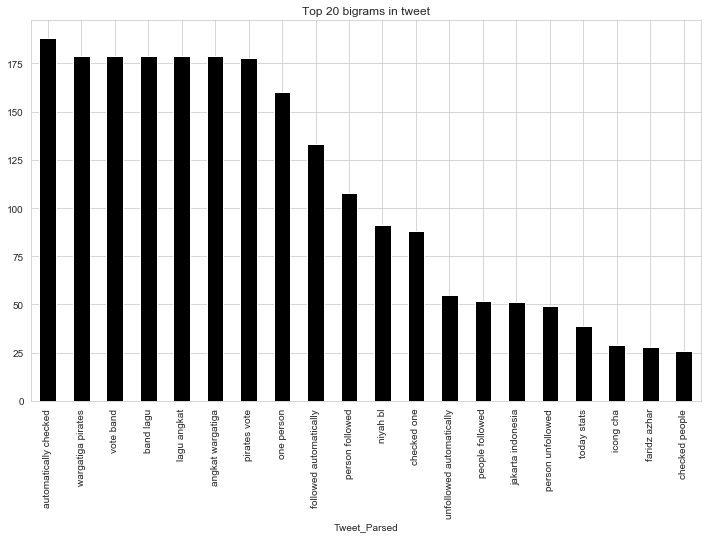

In [79]:
common_words = get_top_n_bigram(data_anl_['Tweet_Parsed'], 20)
topbigram = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topbigram.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet', figsize=(12,7))

In [80]:
dataa = data_train.loc[data_train['K'] == 'Guardian']
data_anl_ = dataa[["Tweet_Parsed"]].copy()

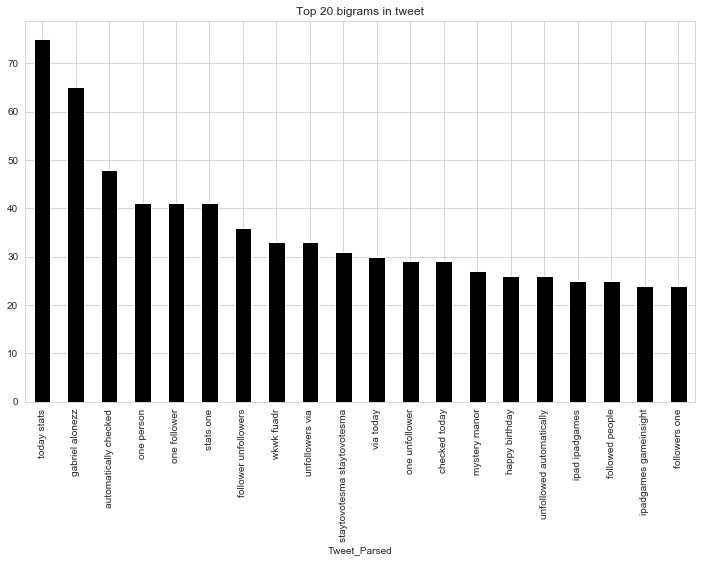

In [81]:
common_words = get_top_n_bigram(data_anl_['Tweet_Parsed'], 20)
topbigram = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topbigram.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet', figsize=(12,7))

#### 2. Data Test 

In [40]:
data_anl_ = data_test[["Tweet_Parsed"]].copy()

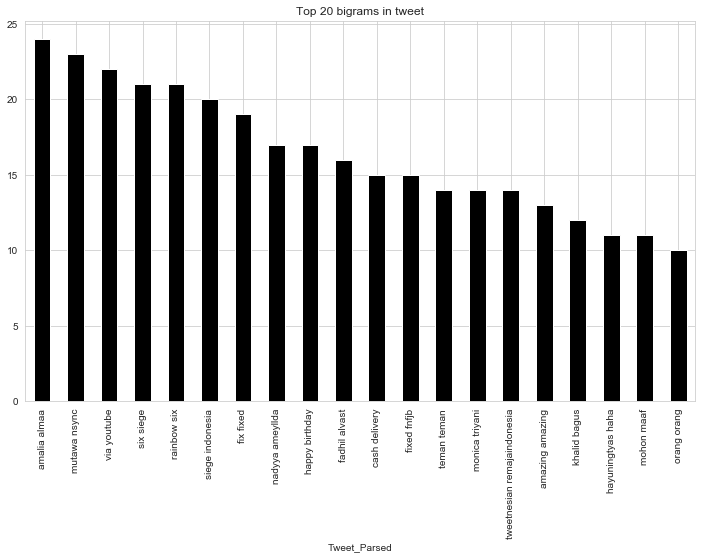

In [41]:
common_words = get_top_n_bigram(data_anl_['Tweet_Parsed'], 20)
topbigram = pd.DataFrame(common_words, columns = ['Tweet_Parsed' , 'count'])
topbigram.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet', figsize=(12,7))